<a href="https://colab.research.google.com/github/whisper120/Cloud_computing_Course/blob/main/tergul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import requests
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt



In [12]:
def fetch_page(url):
  response = requests.get(url)
  if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup
  else:
    return None

In [13]:
def index_words(soup):
    index = {}
    words = re.findall(r'\w+', soup.get_text())
    for word in words:
        word = word.lower()
        if word in index:
            index[word] += 1
        else:
           index[word] = 1
    return index


In [53]:
def remove_stop_words(index):
  stop_words = {'a', 'an', 'the', 'and', 'or','in', 'on', 'at', 'to' , 'all' , 'see' , 'of' ,'n','also'}
  for stop_word in stop_words:
    if stop_word in index:
      del index[stop_word]
  return index


In [15]:
def apply_stemming(index):
  stemmer = PorterStemmer()
  stemmed_index = {}
  for word, count in index.items():
    stemmed_word = stemmer.stem(word)
    if stemmed_word in stemmed_index:
      stemmed_index[stemmed_word] += count
    else:
      stemmed_index[stemmed_word] = count
  return stemmed_index


In [38]:
def search_engine(url, query):
  soup = fetch_page(url)
  if soup is None:
    return None
  index = index_words(soup)
  index = remove_stop_words(index)
  index = apply_stemming(index)
  #results = search(query, index)
  #return results
  return index


In [29]:
def search(query, index):
    stemmer = PorterStemmer()
    query_words = re.findall(r'\w+', query.lower())
    results = {}
    for word in query_words:
        stemmed_word = stemmer.stem(word)
        if stemmed_word in index:
            results[stemmed_word] = index[stemmed_word]
    return results

context 676
type 656
keyboard 631
shortcut 631
plan 626
part 524
studio 369
assembl 279
draw 226
sketch 220


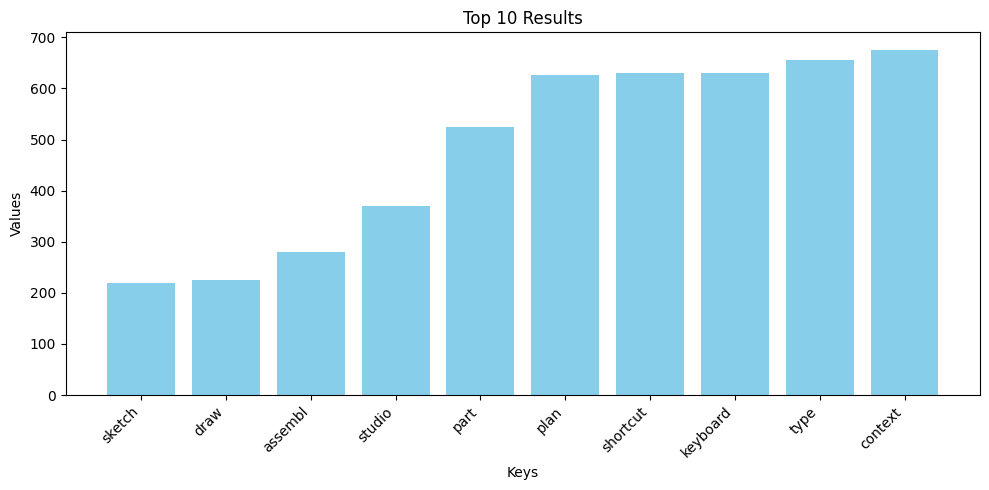

In [54]:
url = 'https://cad.onshape.com/help/Content/Glossary/glossary.htm?tocpath=_____19'
query = ''

top_keys = []
top_values = []

results = search_engine(url, query)
for i in range(10):
  max_key = max(results, key=results.get)
  top_keys.append(max_key)
  max_value = results[max_key]
  top_values.append(max_value)
  print(max_key + " " + str(max_value))
  del results[max_key]

top_keys.reverse()
top_values.reverse()

# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(top_keys, top_values, color='skyblue')

# Add title and labels
plt.title('Top 10 Results')
plt.xlabel('Keys')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()
plt.show()
